In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pylcp
import scipy.constants as cts
from pylcp.common import progressBar
import pandas as pd

In [14]:
# Set to "rateeq" or "obe" for different models.
eq = "obe"

In [15]:
det = -2.0
alpha = 1.0
s = 1.0

# Define the atomic Hamiltonian for 7Li:
atom = pylcp.atom("39K")
H_g_D2, mu_q_g_D2, basis_g = pylcp.hamiltonians.hyperfine_coupled(
    atom.state[0].J, atom.I, atom.state[0].gJ, atom.gI,
    atom.state[0].Ahfs/atom.state[2].gammaHz, Bhfs=0, Chfs=0,
    muB=1, return_basis=True)
H_e_D2, mu_q_e_D2, basis_e = pylcp.hamiltonians.hyperfine_coupled(
    atom.state[2].J, atom.I, atom.state[2].gJ, atom.gI,
    Ahfs=atom.state[2].Ahfs/atom.state[2].gammaHz,
    Bhfs=atom.state[2].Bhfs/atom.state[2].gammaHz, Chfs=0,
    muB=1, return_basis=True)

dijq_D2 = pylcp.hamiltonians.dqij_two_hyperfine_manifolds(
    atom.state[0].J, atom.state[2].J, atom.I)

E_e_D2 = np.unique(np.diagonal(H_e_D2))
E_g_D2 = np.unique(np.diagonal(H_g_D2))

hamiltonian_D2 = pylcp.hamiltonian(H_g_D2, H_e_D2, mu_q_g_D2, mu_q_e_D2, dijq_D2)

# Now, we need two sets of laser beams -> one for F=1->2 and one for F=2->3:
laserBeams_cooling_D2 = pylcp.conventional3DMOTBeams(
    s=s, delta=(E_e_D2[3] - E_g_D2[1]) + det)
laserBeams_repump_D2 = pylcp.conventional3DMOTBeams(
    s=s, delta=(E_e_D2[2] - E_g_D2[0]) + det)
laserBeams_D2 = laserBeams_cooling_D2 + laserBeams_repump_D2

#magField = pylcp.quadrupoleMagneticField(alpha)
magField = pylcp.constantMagneticField(np.array([0., 0., 0.]))

print("basis_g = \n", basis_g)
print("basis_e = \n", basis_e)

basis_g = 
 [[ 1.  1.  1.  2.  2.  2.  2.  2.]
 [-1.  0.  1. -2. -1.  0.  1.  2.]]
basis_e = 
 [[ 0.  1.  1.  1.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  3.  3.]
 [-0. -1.  0.  1. -2. -1.  0.  1.  2. -3. -2. -1.  0.  1.  2.  3.]]


In [16]:
print(E_e_D2)
print(E_g_D2)
print(E_e_D2[0])

[-3.20874742 -2.66081853 -1.10335513  2.38685409]
[-47.8132692   28.68796152]
-3.2087474166927454


In [17]:
x = np.linspace(0.0, 0.0, num=1)
v = np.concatenate((np.linspace(1e-2, 0.5, num=10),
              np.linspace(0.5, 2.5, num=5)))

#dx = np.mean(np.diff(x))
#dv = np.mean(np.diff(v))

X, V = np.meshgrid(x, v)

# Define the trap:
if eq == "rateeq":
    trap_D2 = pylcp.rateeq(
        laserBeams_D2, magField, hamiltonian_D2,
        include_mag_forces=False
    )
else:
    trap_D2 = pylcp.obe(
        laserBeams_D2, magField, hamiltonian_D2,
        include_mag_forces=False
    )
trap_D2.generate_force_profile(
    [np.zeros(X.shape), np.zeros(X.shape), X],
    [np.zeros(V.shape), np.zeros(V.shape), V],
    name='Fz', progress_bar=True)
Fz_D2 = trap_D2.profile['Fz'].F[2]

Completed in 17:02:59.                                               


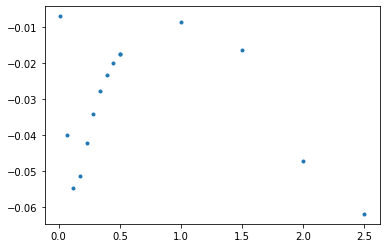

In [18]:
fig, ax = plt.subplots()
ax.plot(V, Fz_D2, '.')